# Geospatial Computing - Introduction to GeoPandas

### Extra Readings
[GeoPandas - Getting Started](https://geopandas.org/en/stable/getting_started/introduction.html) 

[GeoPandas - Official Documentation](https://geopandas.org/en/stable/docs.html) - Contains user guides for common applications, the API reference (like the RhinoCommon API reference), and examples.

---

## Introducing Pandas

### Pandas works with Tabular Data - like Excel

Before we talk about the library *GeoPandas* let's look at the library that it is built upon, *Pandas*. 

*Pandas* is a library that allows us to work with *tabular data* and to perform analyses on that tabular data. 

Pandas is essentially the Python interface to a Excel-like workflow. We use rows and columns (tabular data) to store data that we can perform operations on to yield insights.


Note the grand insights in this image.

<img src="img\excel.jpg" width="600"> 

<br>
<br>

Instead of graphically manipulating spreadsheets as we do in excel, we manipulate *dataframes* using Python code. A dataframe is the class that describes the tabular data that we can manipulate. 

<img src="img\dataframe.png" width="600"> 


### Pandas has a few advantages over Excel

**Pandas is Faster and Can Handle Much Bigger Data Sets**

Pandas is based on yet another library *NumPy*. NumPy is used for extremely complicated numerical operations, and as such, is extremely fast and memory efficient. This coupled with the fact that Pandas doesn't need all the bells and whistles of a GUI, means that it is able to process much larger datasets and do so much faster.

**Pandas can use SQL style Joins**

Pandas also borrows methods from old-school databases and structured query language (SQL). You can perform boolean operations on tables. For instance, if you have one table that contains all current SALA students and their favorite food, and another table with all current SALA students and their birthplace, you could easily join the two tables to test for correlations.

<img src="img\pandas_join.jpg" width="600"> 

**You can write rules to process multiple data sources**

In Excel, you perform destructive actions on a spreadsheet. These actions are also intrinsicly tied to the data. For instance, if you delete every second row, that data is gone. If you average a column, that calculation is saved in the same file as  the data.

Pandas splits operations and selections from data. For instance, if you select every second row from a data source, you do not affect the input data source, you are merely creating a *view*. If you calculate the average of a column, you can save this as a variable outside of the dataframe, and you will not affect the input data.

This data / operations split means that we can write rules that can be applied to multiple data sources.

**Pandas can read many file formats**

Pandas can read many file formats, including excel formats. 

**Pandas Utilizes Python!**

**All this being said, we still can visualize dataframes using a Python notebook! We can essentially get the best of both worlds.**

<br>
<br>

---


## Introducing GeoPandas

### GeoPandas is Pandas + Spatial Geometry

GeoPandas is a library that inherits Pandas' dataframe class and adds a geometry column. We call this a *GeoDataFrame*. 

From the official documentation:

The core data structure in GeoPandas is the `geopandas.GeoDataFrame`, a subclass of `pandas.DataFrame`, that can store geometry columns and perform spatial operations.

The GeoDataFrame allows us to work with another type of tabular data - GIS data. GIS data formats such as *geojson* contain accurate representations of the real world coupled with extra data. For a rough analogy, imagine you could store information about all buildings in downtown Vancouver in an excel spreadsheet, but also include one column that contain building footprints.

<img src="img\geodata.png" width="600"> 

### Why Use GeoPandas as an Urban Practitioner?

GeoPandas allows us to perform complex spatial analyses that we would otherwise be unable to accomplish. We can:

* plot maps with visual representations of non-spatial data (polling results for instance)
* calculate spatial statistics (What percentage of buildings fall in view cones? Have buildings on average gotten smaller or bigger in Vancouver over the last x years?)
* calculate spatial dimensions (How many square feet of park space exist in Vancouver? What's the shortest path from point A to point B?)
* compare conditions (Is my building's site under or over valued? Larger or smaller than average for it's zone?)
* And many other useful things!

A few interesting examples of GeoPandas in action from [Geoff Boeing](https://geoffboeing.com/)

*Street Orientation of Major Cities*

<img src="img\street_or.png" width="600"> 

<br>

*Walkability of Berkley / Oakland*

<img src="img\walking.png" width="600"> 


<br>
<br>

---

## Where do we find the Data to Make the Analyses / Maps?

Most major cities will host a website containing all sorts of different geospatial products. In this course, we will focus on the the [City of Vancouver's Open Data Portal](https://opendata.vancouver.ca/pages/home/).

For example, here's a [bunch of links to B.C. and Canadian cities](https://libguides.tru.ca/opendata/repositories). Here are links for [New York](https://opendata.cityofnewyork.us/), [Helsinki](https://www.hel.fi/en/decision-making/information-on-helsinki/maps-and-geospatial-data/make-better-use-of-geospatial-data/open-geographic-data), [London, England](https://data.london.gov.uk/high-street-data-service/open-data/), [Delhi](https://data.opencity.in/dataset?city=Delhi), and [Tokyo](https://portal.data.metro.tokyo.lg.jp/).

### This workbook's example - Vancouver Property Parcels

For this workbook, we will start out by looking at the [Property Parcel Polygons](https://opendata.vancouver.ca/explore/dataset/property-parcel-polygons/information/?disjunctive.streetname). I chose this data set as it's a good combination of geometry (the property parcels) as well as extra data like street addresses, tax numbers, etc.

### Navigating the COV Open Data Portal

When you navigate to a dataset's page, you will be greeted by an interface like so:

<img src="img\polygon_data.png" width="800"> 

I've highlighted the important areas.

### Dataset Schema

Expand this tab. You will see that the schema is a list of all data columns contained within the table. For instance, this dataset contains the street number and street (combined to by the address), the tax number, a polygon representation of the site, and a few other identifying features.

### Map

When you open the *map* tab, you will see the spatial extents of the data contained within the specific dataset. If your dataset contains polygons or lines (property parcels are polygons), you will also see previews of the geometry themselves.

You usually don't want to download the entire dataset. To choose a smaller section, you can use the crop tools indicated below to select a portion of the overall data set.

<img src="img\cov_map.png" width="800"> 


### Export

The *export* tab is where we download our data. We can download the requested data in more than a few different formats. For GeoPandas, I find that [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON) works quite well. In other circumstances, where a data set is HUGE, you might also look into *parquet*.

When you do download the data, make sure you only download the records you have previously selected via the map.

<img src="img\export.png" width="800"> 

### Export - A Note about Geographic Coordinate Options

A *Coordinate reference system (CRS)* often referred to as a *projection*, is the way in which a portion of the roundish globe is projected to a flat plane. By default, the COV open data portal, and most other open data sources default to a CRS *WGS84*. WGS84 does a great job of approximating the entire world. The world map you remember from your grade school walls was probably projected with WGS84:

<img src="img\wgs84.jpg" width="800"> 

However, when we use this project Vancouver with WGS84, we get quite a bit of distortion. The CRS just isn't meant to be accurate for city scale work. This is why we chose the more localized, and accurate projection [*EPSG:26910*](https://spatialreference.org/ref/epsg/26910/). If we don't use the more locally accurate system, any area and distance calculations will be incorrect.

<img src="img\EPSG.png" width="800"> 

<br>
<br>

---

## Diving into Code!

You will find that using GeoPandas is much less code heavy than what we've been doing. We will really be using Python more as an exploratory language. That being said, we still start with the usual `import` statement.

In [2]:
import geopandas

In [2]:
import geopandas

### Reading a File 

To start analyizing our data, we need to initialize a `GeoDataFrame` object. If we are starting from scratch, we do so by reading data that we've downloaded using the function `read_file`. 

I'd encourage you to create a `data` folder in your project folder and store all your datasets within. To reference a contained dataset within a data folder, you can use the *relative path* formatted as a string. In other words, `data/data_set.geojson`.

In [3]:
cov_parcels = geopandas.read_file('data/parcels.geojson')

In [4]:
cov_parcels

,civic_number,streetname,tax_coord,site_id,geo_point_2d,geometry
0,1483,LAMEY'S MILL ROAD,63713208,007044674,"{'lon': 490031.55033602996, 'lat': 5457408.489...","POLYGON ((490060.16800 5457445.50500, 490036.0..."
1,1411,CARTWRIGHT ST,63513257,None,"{'lon': 490144.32625066326, 'lat': 5457556.617...","POLYGON ((490133.85000 5457532.49900, 490133.8..."
2,1359,CARTWRIGHT ST,63513263,None,"{'lon': 490234.39188634953, 'lat': 5457488.594...","POLYGON ((490232.41800 5457471.56000, 490232.4..."
3,1325,CARTWRIGHT ST,63513279,None,"{'lon': 490251.04433352995, 'lat': 5457480.120...","POLYGON ((490251.93800 5457466.34000, 490267.7..."
4,1370,CARTWRIGHT ST,63513238,None,"{'lon': 490214.60011687875, 'lat': 5457415.737...","POLYGON ((490193.91700 5457373.95600, 490211.6..."
...,...,...,...,...,...,...
4360,250,W PENDER ST,59215604,007158980,"{'lon': 491909.5179839661, 'lat': 5458733.3722...","POLYGON ((491929.19300 5458809.43900, 491833.6..."
4361,1610,SALT ST,18363406,BCS3860,"{'lon': 492337.3831380691, 'lat': 5457610.6590...","POLYGON ((492383.30600 5457582.31300, 492384.8..."
4362,1002,SEYMOUR ST,13460602,026801795,"{'lon': 491108.4377266721, 'lat': 5458379.3137...","POLYGON ((491091.93800 5458336.71400, 491150.9..."
4363,188,KEEFER PLACE,17259503,BCS3437,"{'lon': 492106.3690259197, 'lat': 5458524.9671...","POLYGON ((492056.22000 5458593.04300, 492052.5..."


In [5]:
cov_parcels.size

26190

In [8]:
print(f"The table has {cov_parcels.shape[1]} columns")

The table has 6 columns


In [9]:
cov_parcels.columns

Index(['civic_number', 'streetname', 'tax_coord', 'site_id', 'geo_point_2d',
       'geometry'],
      dtype='object')

### Gleaning basic information about the dataframe

In [88]:
# we can show the amount of entries in the table
print(f'amount of entries = {cov_parcels.size}')

# we can show the dimensions of the table
print(f'table dimensions = {cov_parcels.shape[0]} rows X {cov_parcels.shape[1]} columns')

# we can also show the column headers
print("The table has the following columns:")
for column in cov_parcels.columns:
    print(column)

amount of entries = 26190
table dimensions = 4365 rows X 6 columns
The table has the following columns:
civic_number
streetname
tax_coord
site_id
geo_point_2d
geometry


In [12]:
cov_parcels.head(5)

,civic_number,streetname,tax_coord,site_id,geo_point_2d,geometry
0,1483,LAMEY'S MILL ROAD,63713208,007044674,"{'lon': 490031.55033602996, 'lat': 5457408.489...","POLYGON ((490060.16800 5457445.50500, 490036.0..."
1,1411,CARTWRIGHT ST,63513257,None,"{'lon': 490144.32625066326, 'lat': 5457556.617...","POLYGON ((490133.85000 5457532.49900, 490133.8..."
2,1359,CARTWRIGHT ST,63513263,None,"{'lon': 490234.39188634953, 'lat': 5457488.594...","POLYGON ((490232.41800 5457471.56000, 490232.4..."
3,1325,CARTWRIGHT ST,63513279,None,"{'lon': 490251.04433352995, 'lat': 5457480.120...","POLYGON ((490251.93800 5457466.34000, 490267.7..."
4,1370,CARTWRIGHT ST,63513238,None,"{'lon': 490214.60011687875, 'lat': 5457415.737...","POLYGON ((490193.91700 5457373.95600, 490211.6..."


The method `.head(num_rows_to_show)` is especially useul to see the first nth rows of a dataframe.

In [89]:
# we can show the first X amount of rows
cov_parcels.head(6)

,civic_number,streetname,tax_coord,site_id,geo_point_2d,geometry
0,1483,LAMEY'S MILL ROAD,63713208,007044674,"{'lon': 490031.55033602996, 'lat': 5457408.489...","POLYGON ((490060.16800 5457445.50500, 490036.0..."
1,1411,CARTWRIGHT ST,63513257,None,"{'lon': 490144.32625066326, 'lat': 5457556.617...","POLYGON ((490133.85000 5457532.49900, 490133.8..."
2,1359,CARTWRIGHT ST,63513263,None,"{'lon': 490234.39188634953, 'lat': 5457488.594...","POLYGON ((490232.41800 5457471.56000, 490232.4..."
3,1325,CARTWRIGHT ST,63513279,None,"{'lon': 490251.04433352995, 'lat': 5457480.120...","POLYGON ((490251.93800 5457466.34000, 490267.7..."
4,1370,CARTWRIGHT ST,63513238,None,"{'lon': 490214.60011687875, 'lat': 5457415.737...","POLYGON ((490193.91700 5457373.95600, 490211.6..."
5,1318,CARTWRIGHT ST,63513252,None,"{'lon': 490232.2580578818, 'lat': 5457411.0321...","POLYGON ((490211.61700 5457369.21600, 490229.2..."


In [13]:
the_list = [1,2,3,4,5]

In [17]:
the_list[:-1]

[1, 2, 3, 4]

In [25]:
cov_parcels.loc[:50, ["civic_number", "streetname", "geometry"]]

,civic_number,streetname,geometry
0,1483,LAMEY'S MILL ROAD,"POLYGON ((490060.16800 5457445.50500, 490036.0..."
1,1411,CARTWRIGHT ST,"POLYGON ((490133.85000 5457532.49900, 490133.8..."
2,1359,CARTWRIGHT ST,"POLYGON ((490232.41800 5457471.56000, 490232.4..."
3,1325,CARTWRIGHT ST,"POLYGON ((490251.93800 5457466.34000, 490267.7..."
4,1370,CARTWRIGHT ST,"POLYGON ((490193.91700 5457373.95600, 490211.6..."
5,1318,CARTWRIGHT ST,"POLYGON ((490211.61700 5457369.21600, 490229.2..."
6,1318,CARTWRIGHT ST,"POLYGON ((490229.26600 5457364.49600, 490246.9..."
7,1290,CARTWRIGHT ST,"POLYGON ((490246.91600 5457359.77600, 490264.5..."
8,1405,ANDERSON ST,"POLYGON ((490060.71900 5457490.26700, 490063.6..."
9,1490,JOHNSTON ST,"POLYGON ((490244.96900 5457514.62100, 490283.0..."


### Selecting data with .loc

**Almost like Python Slicing**

We can use the method `.loc` to select columns and rows. `.loc` works similar to slice notation in standard Python, but is inclusive of the end bounds. For instance `[0:99]` in Python would return items 0 to 98, while `dataframe.loc[0:99]` return rows 0 to 99.

**2D Slicing with Column Names**

Since a geodataframe is a table, with column headers, we can specify what rows and columns we want using this following syntax:

```python
data_frame.loc[row_slice_start:row_slice_end, "column_name"]
```

We can modify the arguments to retrieve even more specific selections as detailed in the steps below.


In [90]:
# if we want to select a particular column we can use the method 'loc' coupled with a 2D slice notation
# the syntax is geo_dataframe.loc[row_slice, column_slice]

# to get all rows in streetname
cov_parcels.loc[:, "streetname"]

0       LAMEY'S MILL ROAD
1           CARTWRIGHT ST
2           CARTWRIGHT ST
3           CARTWRIGHT ST
4           CARTWRIGHT ST
              ...        
4360          W PENDER ST
4361              SALT ST
4362           SEYMOUR ST
4363         KEEFER PLACE
4364         CANADA PLACE
Name: streetname, Length: 4365, dtype: object

In [91]:
# to get the first 100 rows in "streetname"
# note that the slice notation is slightly different. It's start:stop(inclusive):step
cov_parcels.loc[:99, "streetname"]

0     LAMEY'S MILL ROAD
1         CARTWRIGHT ST
2         CARTWRIGHT ST
3         CARTWRIGHT ST
4         CARTWRIGHT ST
            ...        
95           CARDERO ST
96           BIDWELL ST
97          PENDRELL ST
98           GILFORD ST
99            NELSON ST
Name: streetname, Length: 100, dtype: object

We can use the slice notation between *string* column names to return a range of columns.

In [7]:
# the first 100 rows in columns 'civic_number' to 'tax_coords'
cov_parcels.loc[:99, "civic_number":"tax_coord"]

,civic_number,streetname,tax_coord
0,1483,LAMEY'S MILL ROAD,63713208
1,1411,CARTWRIGHT ST,63513257
2,1359,CARTWRIGHT ST,63513263
3,1325,CARTWRIGHT ST,63513279
4,1370,CARTWRIGHT ST,63513238
...,...,...,...
95,1038,CARDERO ST,11460674
96,956,BIDWELL ST,11360554
97,1937,PENDRELL ST,60910855
98,1154,GILFORD ST,61110905


We can also select specific columns by passing their names in square brackets `[]`.

In [8]:
# selecting specific columns
cov_parcels.loc[:99, ["civic_number", "streetname", "geometry"]]

,civic_number,streetname,geometry
0,1483,LAMEY'S MILL ROAD,"POLYGON ((490060.16800 5457445.50500, 490036.0..."
1,1411,CARTWRIGHT ST,"POLYGON ((490133.85000 5457532.49900, 490133.8..."
2,1359,CARTWRIGHT ST,"POLYGON ((490232.41800 5457471.56000, 490232.4..."
3,1325,CARTWRIGHT ST,"POLYGON ((490251.93800 5457466.34000, 490267.7..."
4,1370,CARTWRIGHT ST,"POLYGON ((490193.91700 5457373.95600, 490211.6..."
...,...,...,...
95,1038,CARDERO ST,"POLYGON ((490095.29100 5459339.09900, 490109.5..."
96,956,BIDWELL ST,"POLYGON ((490090.38800 5459534.15000, 490076.1..."
97,1937,PENDRELL ST,"POLYGON ((489622.18000 5459632.97900, 489650.2..."
98,1154,GILFORD ST,"POLYGON ((489651.91400 5459518.75900, 489666.3..."


In [26]:
cov_parcels

,civic_number,streetname,tax_coord,site_id,geo_point_2d,geometry
0,1483,LAMEY'S MILL ROAD,63713208,007044674,"{'lon': 490031.55033602996, 'lat': 5457408.489...","POLYGON ((490060.16800 5457445.50500, 490036.0..."
1,1411,CARTWRIGHT ST,63513257,None,"{'lon': 490144.32625066326, 'lat': 5457556.617...","POLYGON ((490133.85000 5457532.49900, 490133.8..."
2,1359,CARTWRIGHT ST,63513263,None,"{'lon': 490234.39188634953, 'lat': 5457488.594...","POLYGON ((490232.41800 5457471.56000, 490232.4..."
3,1325,CARTWRIGHT ST,63513279,None,"{'lon': 490251.04433352995, 'lat': 5457480.120...","POLYGON ((490251.93800 5457466.34000, 490267.7..."
4,1370,CARTWRIGHT ST,63513238,None,"{'lon': 490214.60011687875, 'lat': 5457415.737...","POLYGON ((490193.91700 5457373.95600, 490211.6..."
...,...,...,...,...,...,...
4360,250,W PENDER ST,59215604,007158980,"{'lon': 491909.5179839661, 'lat': 5458733.3722...","POLYGON ((491929.19300 5458809.43900, 491833.6..."
4361,1610,SALT ST,18363406,BCS3860,"{'lon': 492337.3831380691, 'lat': 5457610.6590...","POLYGON ((492383.30600 5457582.31300, 492384.8..."
4362,1002,SEYMOUR ST,13460602,026801795,"{'lon': 491108.4377266721, 'lat': 5458379.3137...","POLYGON ((491091.93800 5458336.71400, 491150.9..."
4363,188,KEEFER PLACE,17259503,BCS3437,"{'lon': 492106.3690259197, 'lat': 5458524.9671...","POLYGON ((492056.22000 5458593.04300, 492052.5..."


In [28]:
cov_parcels.iloc[:50, 2:]

,tax_coord,site_id,geo_point_2d,geometry
0,63713208,007044674,"{'lon': 490031.55033602996, 'lat': 5457408.489...","POLYGON ((490060.16800 5457445.50500, 490036.0..."
1,63513257,None,"{'lon': 490144.32625066326, 'lat': 5457556.617...","POLYGON ((490133.85000 5457532.49900, 490133.8..."
2,63513263,None,"{'lon': 490234.39188634953, 'lat': 5457488.594...","POLYGON ((490232.41800 5457471.56000, 490232.4..."
3,63513279,None,"{'lon': 490251.04433352995, 'lat': 5457480.120...","POLYGON ((490251.93800 5457466.34000, 490267.7..."
4,63513238,None,"{'lon': 490214.60011687875, 'lat': 5457415.737...","POLYGON ((490193.91700 5457373.95600, 490211.6..."
5,63513252,None,"{'lon': 490232.2580578818, 'lat': 5457411.0321...","POLYGON ((490211.61700 5457369.21600, 490229.2..."
6,63513258,None,"{'lon': 490249.91514083964, 'lat': 5457406.285...","POLYGON ((490229.26600 5457364.49600, 490246.9..."
7,63513270,None,"{'lon': 490267.58038397867, 'lat': 5457401.568...","POLYGON ((490246.91600 5457359.77600, 490264.5..."
8,63513278,None,"{'lon': 490083.619439595, 'lat': 5457508.46062...","POLYGON ((490060.71900 5457490.26700, 490063.6..."
9,63313333,None,"{'lon': 490256.8064157188, 'lat': 5457542.6368...","POLYGON ((490244.96900 5457514.62100, 490283.0..."


### Selecting data with .iloc

**Just like Python Slicing**

We can use the method `.iloc` to select columns and rows. `.iloc` works the same as Python slicing. For instance `[0:99]` in Python would return items 0 to 98, while `dataframe.loc[0:99]` return rows 0 to 98.

**2D Slicing with Column Indices**

`.iloc` differs from `.loc` in that we use indices rather than names to select columns. The syntax is:

```python
data_frame.iloc[row_slice_start:row_slice_end, column_slice_start:column_slice_end]
```

We won't go through different selections in this notebook, but like `.loc` you can also pass indices in square brackets to select specific columns.

In [94]:
# in comparison to .loc, .iloc allows us to select columns by numbers
# by default .iloc's slicing works like Python , ie. up to but not including
# for example, this selects the first 100 rows, and all but the last column
cov_parcels.iloc[:100, :-1]


,civic_number,streetname,tax_coord,site_id,geo_point_2d
0,1483,LAMEY'S MILL ROAD,63713208,007044674,"{'lon': 490031.55033602996, 'lat': 5457408.489..."
1,1411,CARTWRIGHT ST,63513257,None,"{'lon': 490144.32625066326, 'lat': 5457556.617..."
2,1359,CARTWRIGHT ST,63513263,None,"{'lon': 490234.39188634953, 'lat': 5457488.594..."
3,1325,CARTWRIGHT ST,63513279,None,"{'lon': 490251.04433352995, 'lat': 5457480.120..."
4,1370,CARTWRIGHT ST,63513238,None,"{'lon': 490214.60011687875, 'lat': 5457415.737..."
...,...,...,...,...,...
95,1038,CARDERO ST,11460674,013259008,"{'lon': 490106.9183606912, 'lat': 5459336.5469..."
96,956,BIDWELL ST,11360554,015757943,"{'lon': 490079.7786368678, 'lat': 5459537.7105..."
97,1937,PENDRELL ST,60910855,015735931,"{'lon': 489629.0971991582, 'lat': 5459654.2120..."
98,1154,GILFORD ST,61110905,002763125,"{'lon': 489664.9614986127, 'lat': 5459538.3458..."


### Modifying a Table
In all the above examples, we are returning *views* of the dataframe. We aren't actually modifying the dataframe itself. You can see below that calling the `cov_parcels` dataframe returns our original, unmodified data structure.

In [29]:
# note that all of the above are returning views of the dataframe
# we aren't actually modifying it yet but will do so below
cov_parcels

,civic_number,streetname,tax_coord,site_id,geo_point_2d,geometry
0,1483,LAMEY'S MILL ROAD,63713208,007044674,"{'lon': 490031.55033602996, 'lat': 5457408.489...","POLYGON ((490060.16800 5457445.50500, 490036.0..."
1,1411,CARTWRIGHT ST,63513257,None,"{'lon': 490144.32625066326, 'lat': 5457556.617...","POLYGON ((490133.85000 5457532.49900, 490133.8..."
2,1359,CARTWRIGHT ST,63513263,None,"{'lon': 490234.39188634953, 'lat': 5457488.594...","POLYGON ((490232.41800 5457471.56000, 490232.4..."
3,1325,CARTWRIGHT ST,63513279,None,"{'lon': 490251.04433352995, 'lat': 5457480.120...","POLYGON ((490251.93800 5457466.34000, 490267.7..."
4,1370,CARTWRIGHT ST,63513238,None,"{'lon': 490214.60011687875, 'lat': 5457415.737...","POLYGON ((490193.91700 5457373.95600, 490211.6..."
...,...,...,...,...,...,...
4360,250,W PENDER ST,59215604,007158980,"{'lon': 491909.5179839661, 'lat': 5458733.3722...","POLYGON ((491929.19300 5458809.43900, 491833.6..."
4361,1610,SALT ST,18363406,BCS3860,"{'lon': 492337.3831380691, 'lat': 5457610.6590...","POLYGON ((492383.30600 5457582.31300, 492384.8..."
4362,1002,SEYMOUR ST,13460602,026801795,"{'lon': 491108.4377266721, 'lat': 5458379.3137...","POLYGON ((491091.93800 5458336.71400, 491150.9..."
4363,188,KEEFER PLACE,17259503,BCS3437,"{'lon': 492106.3690259197, 'lat': 5458524.9671...","POLYGON ((492056.22000 5458593.04300, 492052.5..."


If we do want to modify our data frame, most commonly we will just reassign the variable.

For instance, if we want our dataframe to represent only the first 100 rows, we could do this:

```python
cov_parcels = cov_parcels.iloc[:100, :]
```

### Dropping Columns
We can use the method `.drop`, and specify the parameter `columns` to pass a string argument where the string argument is the column name. The next cell demonstrates this.

In [31]:
cov_parcels = cov_parcels.drop(columns="geo_point_2d")

cov_parcels

,civic_number,streetname,tax_coord,site_id,geometry
0,1483,LAMEY'S MILL ROAD,63713208,007044674,"POLYGON ((490060.16800 5457445.50500, 490036.0..."
1,1411,CARTWRIGHT ST,63513257,None,"POLYGON ((490133.85000 5457532.49900, 490133.8..."
2,1359,CARTWRIGHT ST,63513263,None,"POLYGON ((490232.41800 5457471.56000, 490232.4..."
3,1325,CARTWRIGHT ST,63513279,None,"POLYGON ((490251.93800 5457466.34000, 490267.7..."
4,1370,CARTWRIGHT ST,63513238,None,"POLYGON ((490193.91700 5457373.95600, 490211.6..."
...,...,...,...,...,...
4360,250,W PENDER ST,59215604,007158980,"POLYGON ((491929.19300 5458809.43900, 491833.6..."
4361,1610,SALT ST,18363406,BCS3860,"POLYGON ((492383.30600 5457582.31300, 492384.8..."
4362,1002,SEYMOUR ST,13460602,026801795,"POLYGON ((491091.93800 5458336.71400, 491150.9..."
4363,188,KEEFER PLACE,17259503,BCS3437,"POLYGON ((492056.22000 5458593.04300, 492052.5..."


In [97]:
# if we want to drop a column we can simply use
cov_parcels = cov_parcels.drop(columns="geo_point_2d")

cov_parcels

,civic_number,streetname,tax_coord,site_id,geometry
0,1483,LAMEY'S MILL ROAD,63713208,007044674,"POLYGON ((490060.16800 5457445.50500, 490036.0..."
1,1411,CARTWRIGHT ST,63513257,None,"POLYGON ((490133.85000 5457532.49900, 490133.8..."
2,1359,CARTWRIGHT ST,63513263,None,"POLYGON ((490232.41800 5457471.56000, 490232.4..."
3,1325,CARTWRIGHT ST,63513279,None,"POLYGON ((490251.93800 5457466.34000, 490267.7..."
4,1370,CARTWRIGHT ST,63513238,None,"POLYGON ((490193.91700 5457373.95600, 490211.6..."
...,...,...,...,...,...
4360,250,W PENDER ST,59215604,007158980,"POLYGON ((491929.19300 5458809.43900, 491833.6..."
4361,1610,SALT ST,18363406,BCS3860,"POLYGON ((492383.30600 5457582.31300, 492384.8..."
4362,1002,SEYMOUR ST,13460602,026801795,"POLYGON ((491091.93800 5458336.71400, 491150.9..."
4363,188,KEEFER PLACE,17259503,BCS3437,"POLYGON ((492056.22000 5458593.04300, 492052.5..."


### Adding a New Column
We can add a new column to our table with the syntax:

```python
data_frame["new_column_name"] = some_value
```

Usually you will create a new column by performing an operation on existing columns in line similar to an Excel operation. See the example below.

**A note on broadcasting**

In a manner similar to Grasshopper (not Python in GH), an operation will be applied to all rows of the specified columns.

For example if we multiply one column by another, all corresponding rows will be multiplied.

<img src="img\broadcasting.png" width="400"> 



In [32]:
cov_parcels["address"] = cov_parcels["civic_number"] + " " + cov_parcels["streetname"]

cov_parcels

,civic_number,streetname,tax_coord,site_id,geometry,address
0,1483,LAMEY'S MILL ROAD,63713208,007044674,"POLYGON ((490060.16800 5457445.50500, 490036.0...",1483 LAMEY'S MILL ROAD
1,1411,CARTWRIGHT ST,63513257,None,"POLYGON ((490133.85000 5457532.49900, 490133.8...",1411 CARTWRIGHT ST
2,1359,CARTWRIGHT ST,63513263,None,"POLYGON ((490232.41800 5457471.56000, 490232.4...",1359 CARTWRIGHT ST
3,1325,CARTWRIGHT ST,63513279,None,"POLYGON ((490251.93800 5457466.34000, 490267.7...",1325 CARTWRIGHT ST
4,1370,CARTWRIGHT ST,63513238,None,"POLYGON ((490193.91700 5457373.95600, 490211.6...",1370 CARTWRIGHT ST
...,...,...,...,...,...,...
4360,250,W PENDER ST,59215604,007158980,"POLYGON ((491929.19300 5458809.43900, 491833.6...",250 W PENDER ST
4361,1610,SALT ST,18363406,BCS3860,"POLYGON ((492383.30600 5457582.31300, 492384.8...",1610 SALT ST
4362,1002,SEYMOUR ST,13460602,026801795,"POLYGON ((491091.93800 5458336.71400, 491150.9...",1002 SEYMOUR ST
4363,188,KEEFER PLACE,17259503,BCS3437,"POLYGON ((492056.22000 5458593.04300, 492052.5...",188 KEEFER PLACE


In [33]:
# we can see that the civic number and the streetname could be combined to give us the proper address
#the following line creates a new column and then populates it with the combination of the existing two columns
# this works by broadcasting - this is similar to how Grasshopper works, or excel works
cov_parcels["address"] = cov_parcels["civic_number"] + " " + cov_parcels["streetname"]

cov_parcels = cov_parcels.drop(columns=["civic_number", "streetname"])

cov_parcels

,tax_coord,site_id,geometry,address
0,63713208,007044674,"POLYGON ((490060.16800 5457445.50500, 490036.0...",1483 LAMEY'S MILL ROAD
1,63513257,None,"POLYGON ((490133.85000 5457532.49900, 490133.8...",1411 CARTWRIGHT ST
2,63513263,None,"POLYGON ((490232.41800 5457471.56000, 490232.4...",1359 CARTWRIGHT ST
3,63513279,None,"POLYGON ((490251.93800 5457466.34000, 490267.7...",1325 CARTWRIGHT ST
4,63513238,None,"POLYGON ((490193.91700 5457373.95600, 490211.6...",1370 CARTWRIGHT ST
...,...,...,...,...
4360,59215604,007158980,"POLYGON ((491929.19300 5458809.43900, 491833.6...",250 W PENDER ST
4361,18363406,BCS3860,"POLYGON ((492383.30600 5457582.31300, 492384.8...",1610 SALT ST
4362,13460602,026801795,"POLYGON ((491091.93800 5458336.71400, 491150.9...",1002 SEYMOUR ST
4363,17259503,BCS3437,"POLYGON ((492056.22000 5458593.04300, 492052.5...",188 KEEFER PLACE


In [ ]:
# we can now remove the columns we don't need by dropping the columns we combined
cov_parcels = cov_parcels.drop(columns=["civic_number", "streetname"])

cov_parcels

,tax_coord,site_id,geo_point_2d,geometry,address
0,63713208,007044674,"{'lon': 490031.55033602996, 'lat': 5457408.489...","POLYGON ((490060.16800 5457445.50500, 490036.0...",1483 LAMEY'S MILL ROAD
1,63513257,None,"{'lon': 490144.32625066326, 'lat': 5457556.617...","POLYGON ((490133.85000 5457532.49900, 490133.8...",1411 CARTWRIGHT ST
2,63513263,None,"{'lon': 490234.39188634953, 'lat': 5457488.594...","POLYGON ((490232.41800 5457471.56000, 490232.4...",1359 CARTWRIGHT ST
3,63513279,None,"{'lon': 490251.04433352995, 'lat': 5457480.120...","POLYGON ((490251.93800 5457466.34000, 490267.7...",1325 CARTWRIGHT ST
4,63513238,None,"{'lon': 490214.60011687875, 'lat': 5457415.737...","POLYGON ((490193.91700 5457373.95600, 490211.6...",1370 CARTWRIGHT ST
...,...,...,...,...,...
4360,59215604,007158980,"{'lon': 491909.5179839661, 'lat': 5458733.3722...","POLYGON ((491929.19300 5458809.43900, 491833.6...",250 W PENDER ST
4361,18363406,BCS3860,"{'lon': 492337.3831380691, 'lat': 5457610.6590...","POLYGON ((492383.30600 5457582.31300, 492384.8...",1610 SALT ST
4362,13460602,026801795,"{'lon': 491108.4377266721, 'lat': 5458379.3137...","POLYGON ((491091.93800 5458336.71400, 491150.9...",1002 SEYMOUR ST
4363,17259503,BCS3437,"{'lon': 492106.3690259197, 'lat': 5458524.9671...","POLYGON ((492056.22000 5458593.04300, 492052.5...",188 KEEFER PLACE


### Reordering Columns
We can simply recreate the table using slice notation, specifying column order by name to re-order columns.

In [34]:
# if we want to reorder the columns, we can just use the standard notation
cov_parcels = cov_parcels[["tax_coord", "address", "site_id", "geometry"]]

cov_parcels

,tax_coord,address,site_id,geometry
0,63713208,1483 LAMEY'S MILL ROAD,007044674,"POLYGON ((490060.16800 5457445.50500, 490036.0..."
1,63513257,1411 CARTWRIGHT ST,None,"POLYGON ((490133.85000 5457532.49900, 490133.8..."
2,63513263,1359 CARTWRIGHT ST,None,"POLYGON ((490232.41800 5457471.56000, 490232.4..."
3,63513279,1325 CARTWRIGHT ST,None,"POLYGON ((490251.93800 5457466.34000, 490267.7..."
4,63513238,1370 CARTWRIGHT ST,None,"POLYGON ((490193.91700 5457373.95600, 490211.6..."
...,...,...,...,...
4360,59215604,250 W PENDER ST,007158980,"POLYGON ((491929.19300 5458809.43900, 491833.6..."
4361,18363406,1610 SALT ST,BCS3860,"POLYGON ((492383.30600 5457582.31300, 492384.8..."
4362,13460602,1002 SEYMOUR ST,026801795,"POLYGON ((491091.93800 5458336.71400, 491150.9..."
4363,17259503,188 KEEFER PLACE,BCS3437,"POLYGON ((492056.22000 5458593.04300, 492052.5..."


### Setting the Index
By default we have a leftmost column which is the index. This works the same as an index explicitly works in a Grasshopper list, or implicitly within a Python list.

If we have a column composed of *unique* values, we can further clean up the dataframe by setting the index to that column.

In [ ]:
# you can see that we having a leading 'index' column. 
# Since the tax Ids are unique, and these will be the values we cross 
# reference against the tax documents we can set that column as the index.
cov_parcels = cov_parcels.set_index('tax_coord')

cov_parcels

,address,site_id,geometry,geo_point_2d
tax_coord,,,,
63713208,1483 LAMEY'S MILL ROAD,007044674,"POLYGON ((490060.16800 5457445.50500, 490036.0...","{'lon': 490031.55033602996, 'lat': 5457408.489..."
63513257,1411 CARTWRIGHT ST,None,"POLYGON ((490133.85000 5457532.49900, 490133.8...","{'lon': 490144.32625066326, 'lat': 5457556.617..."
63513263,1359 CARTWRIGHT ST,None,"POLYGON ((490232.41800 5457471.56000, 490232.4...","{'lon': 490234.39188634953, 'lat': 5457488.594..."
63513279,1325 CARTWRIGHT ST,None,"POLYGON ((490251.93800 5457466.34000, 490267.7...","{'lon': 490251.04433352995, 'lat': 5457480.120..."
63513238,1370 CARTWRIGHT ST,None,"POLYGON ((490193.91700 5457373.95600, 490211.6...","{'lon': 490214.60011687875, 'lat': 5457415.737..."
...,...,...,...,...
59215604,250 W PENDER ST,007158980,"POLYGON ((491929.19300 5458809.43900, 491833.6...","{'lon': 491909.5179839661, 'lat': 5458733.3722..."
18363406,1610 SALT ST,BCS3860,"POLYGON ((492383.30600 5457582.31300, 492384.8...","{'lon': 492337.3831380691, 'lat': 5457610.6590..."
13460602,1002 SEYMOUR ST,026801795,"POLYGON ((491091.93800 5458336.71400, 491150.9...","{'lon': 491108.4377266721, 'lat': 5458379.3137..."


### Basic Plotting

We will dive further into plotting later in the course, but for now, know that at anytime you can plot your data with `data_frame.plot()`.

**A note on what's actually plotted**
By default, GeoPandas will only plot one geometry column. If there is a column called *geometry*, it will plot that column. 

<Axes: >

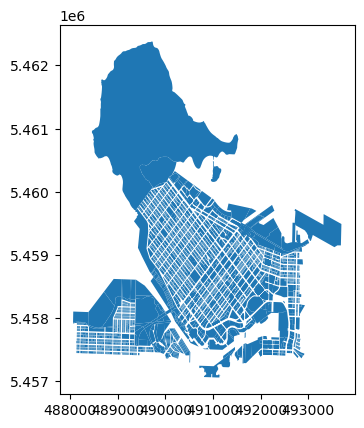

In [35]:
cov_parcels.plot()

<Axes: >

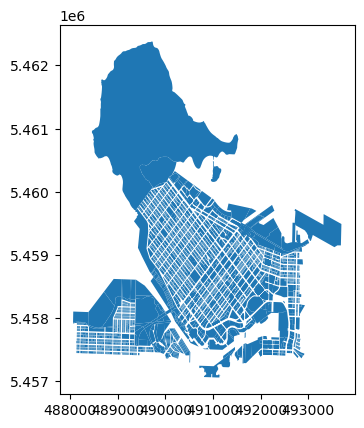

In [ ]:
# since this is a geodataframe, we can plot it!
# you will see that the x and y axis refer to latitude and longitude

cov_parcels.plot()

### Setting the CRS
By default GeoPandas will assign the CRS *EPSG:4326* which we have referred to before as *WGS 84* - AKA - the world map projection. This default projection is what is causing the above plot to look skewed. We can confirm this by accessing the attribute `data_frame.crs`.

In [36]:
cov_parcels.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

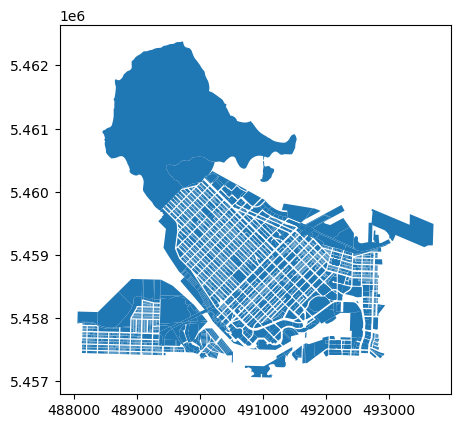

In [38]:
cov_parcels = cov_parcels.set_crs(epsg=26910, allow_override=True)

cov_parcels.plot()

In [ ]:
# since it is geographical information, it also has a Coordinate reference system (projection)
# we can check what the CRS is like so:
cov_parcels.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

To reset the CRS to what it should be (EPSG:26910), we can use the method `data_frame.set_crs()` and pass the 4 digit identifier into the parameter `epsg`. 

If you receive an error, you will often also have to set the parameter `allow_override` to `True`.

In [9]:
# WGS 84 is the standard worldwide CRS - it's great for a map but not so much for a city scale analysis
# we can set it's CRS to EPSG 26910 to match the format we downloaded
cov_parcels = cov_parcels.set_crs(epsg=26910, allow_override=True)

In [10]:
cov_parcels.crs

<Projected CRS: EPSG:26910>
Name: NAD83 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 126°W and 120°W - onshore and offshore. Canada - British Columbia; Northwest Territories; Yukon. United States (USA) - California; Oregon; Washington.
- bounds: (-126.0, 30.54, -119.99, 81.8)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

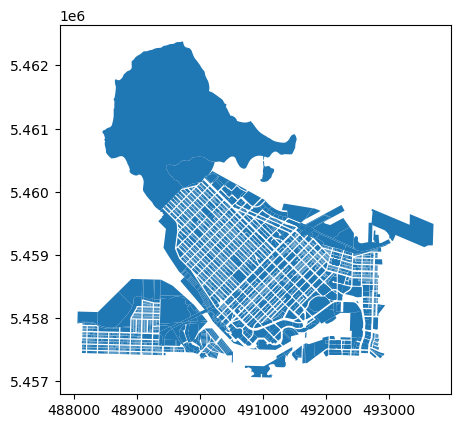

In [11]:
# this will look less skewed
cov_parcels.plot()

### Basic Spatial Analysis

GeoPandas is able to calculate a few spatial qualities out of the box: *area*, *distance*, *centroid*, and *boundary*. 

These qualities are stored as attributes of the GeoDataFrame and correspond to each entry within the geometry column.

For example, we can calculate the area of all polygons and store those values in a new column.

In [ ]:
# we can do spatial analyses in the dataframe itself
# for example we could calculate the area of each lot and add a new column
# this attribute returns the area of each polygon
cov_parcels['area'] = cov_parcels.area

cov_parcels

,address,site_id,geometry,geo_point_2d,area
tax_coord,,,,,
63713208,1483 LAMEY'S MILL ROAD,007044674,"POLYGON ((490060.168 5457445.505, 490036.068 5...","{'lon': 490031.55033602996, 'lat': 5457408.489...",4403.401818
63513257,1411 CARTWRIGHT ST,None,"POLYGON ((490133.850 5457532.499, 490133.870 5...","{'lon': 490144.32625066326, 'lat': 5457556.617...",767.259800
63513263,1359 CARTWRIGHT ST,None,"POLYGON ((490232.418 5457471.560, 490232.418 5...","{'lon': 490234.39188634953, 'lat': 5457488.594...",683.696384
63513279,1325 CARTWRIGHT ST,None,"POLYGON ((490251.938 5457466.340, 490267.718 5...","{'lon': 490251.04433352995, 'lat': 5457480.120...",525.188305
63513238,1370 CARTWRIGHT ST,None,"POLYGON ((490193.917 5457373.956, 490211.617 5...","{'lon': 490214.60011687875, 'lat': 5457415.737...",1671.558955
...,...,...,...,...,...
59215604,250 W PENDER ST,007158980,"POLYGON ((491929.193 5458809.439, 491833.640 5...","{'lon': 491909.5179839661, 'lat': 5458733.3722...",10743.347528
18363406,1610 SALT ST,BCS3860,"POLYGON ((492383.306 5457582.313, 492384.886 5...","{'lon': 492337.3831380691, 'lat': 5457610.6590...",5045.170213
13460602,1002 SEYMOUR ST,026801795,"POLYGON ((491091.938 5458336.714, 491150.937 5...","{'lon': 491108.4377266721, 'lat': 5458379.3137...",3066.557700


We can also use built-in methods like `min()` and `max()` to return the minimum or maximum values of the area column.

In [ ]:
# we can now see interesting stats like whats the min area
cov_parcels["area"].min()

0.9999999978754204

### Using Basic Selection Conditionals

Just like in Python where we can test a condition using a conditional like `if condition == True`, we can return data based on conditions.

We perform these sorts of conditional tests with the syntax:

```python
data_frame[condtional_statement]
```

In the example below, we are returning the row whose area is equal to the minimum area. Note that in this case, there is one row returned, but in other situations you might have multiple rows that meet the condition.

In [ ]:
# and see where it actually is
cov_parcels[cov_parcels["area"] == cov_parcels["area"].min()]

,address,site_id,geometry,geo_point_2d,area
tax_coord,,,,,
13060003,NaN,016057104,"POLYGON ((491380.388 5458839.681, 491381.388 5...","{'lon': 491380.8880000006, 'lat': 5458840.1809...",1.0


### Cleaning Data

Often, large datasets will include junk data. In this called the address of the returned minimum area lot is *NaN* which is is Numpy's `np.NaN` object that represents a null value. In other words, data is missing. 

Cleaning data is a serious topic in itself, but for now, we can just drop null values using the method `.dropna()`.

In [ ]:
# NaN means null. These values could be artifacts. To get rid of null values in data, you can use the method .dropna()
cov_parcels = cov_parcels.dropna()

cov_parcels[cov_parcels["area"] == cov_parcels["area"].min()]

,address,site_id,geometry,geo_point_2d,area
tax_coord,,,,,
14860004,300 W GEORGIA ST,019204043,"POLYGON ((491610.755 5458597.859, 491611.755 5...","{'lon': 491611.2550000034, 'lat': 5458598.3589...",1.0


### Creating a Representing Area

We can easily represent a non-geometric value by passing its column name as an argument into `plot()`

<Axes: >

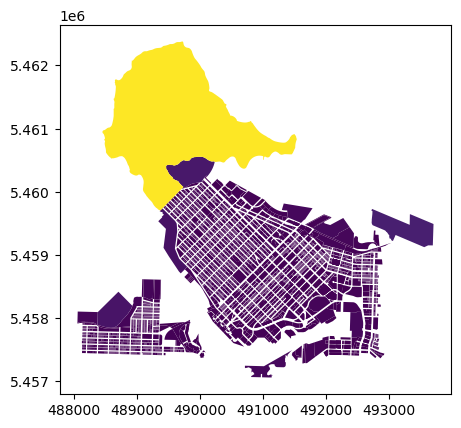

In [ ]:
# we can now plot these with the areas as a legend
cov_parcels.plot("area")

<Axes: >

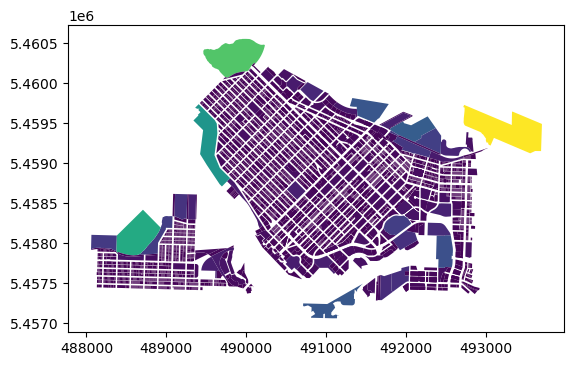

In [ ]:
# obviously stanley park is a problem....

# see the updated value
cov_parcels = cov_parcels[cov_parcels["area"] != cov_parcels["area"].max()]

cov_parcels.plot("area")

<Axes: >

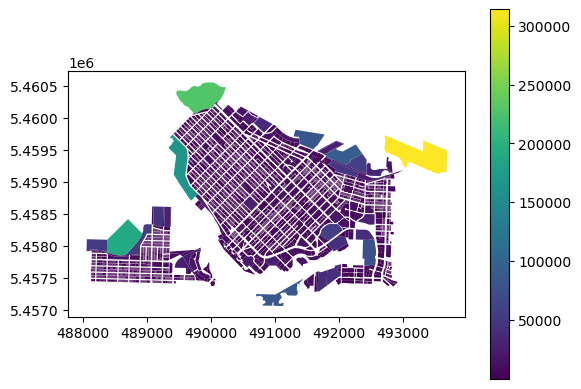

In [ ]:
# we can also include a legend
cov_parcels.plot("area", legend=True)